# Multiple Linear Regression

- Multiple regression expands on simple linear regression by using more than one input variable to predict the target
- While simple regression relies on just one input, multiple regression uses several variables together to capture a more complete picture of how they affect the target
- Each variable has its own weight, showing how much it influences the outcome, and these weights combine to give the final prediction.
- The relationship between the variables and the target is still linear, but with more inputs, the model can adapt to more complex data
- The "decision boundary" in multiple regression is like a flat surface in higher dimensions. it could be a line, a rectangle, or a more complex shape, depending on how many variables are used
- This allows the model to better understand and predict outcomes by factoring in multiple influences at once


$f_{w,b}(x) = y = w_0x_0 + w_1x_1+... + w_{n}x_{n} + b=w^T \cdot x + b$

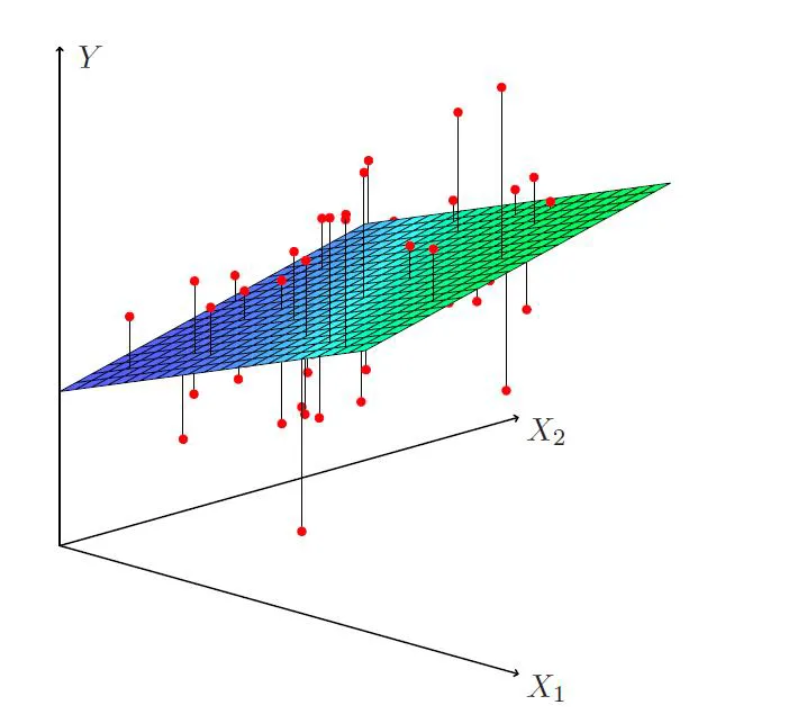


Image source: 
https://medium.com/analytics-vidhya/multiple-linear-regression-an-intuitive-approach-f874f7a6a7f9

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [98]:
data = pd.read_csv('salary_dataset.csv')

In [99]:
print("Checking for NaN values:")
print(data.isnull().sum())

Checking for NaN values:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Salary_lpa             0
dtype: int64


In [100]:
data.dropna(inplace=True) 
print(data.isnull().sum()) 

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Salary_lpa             0
dtype: int64


In [101]:
#features and target
X = data[['Years of Experience', 'Age']]  # Two features: Years of Experience and Age
y = data['Salary_lpa']  # Target variable: Salary

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
# Normalize the features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [106]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_normalized, y_train_normalized)

LinearRegression()

# test values

In [107]:
new_value = np.array([[15,45]])  # Years of Experience and age

# Normalize the input
new_value_normalized = scaler_X.transform(new_value)

# Predict using the trained model
predicted_normalized = model.predict(new_value_normalized)

# Inverse transform the prediction to get back to the original scale
predicted_salary = scaler_y.inverse_transform(predicted_normalized.reshape(-1, 1))
predicted_salary

C:\Users\prave\.conda\envs\torch\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[19.05068257]])

C:\Users\prave\.conda\envs\torch\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


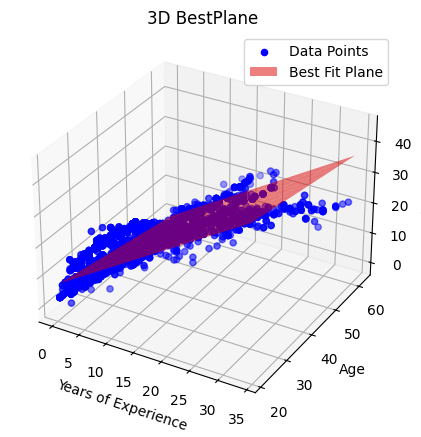

In [108]:
# Prepare for 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot of the original data points
ax.scatter(X_train['Years of Experience'], X_train['Age'], y_train, color='blue', label='Data Points')

# Create a grid for the best-fit plane
x1_range = np.linspace(X['Years of Experience'].min(), X['Years of Experience'].max(), 10)
x2_range = np.linspace(X['Age'].min(), X['Age'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict the corresponding y values for the grid
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
X_grid_normalized = scaler_X.transform(X_grid)
y_grid_normalized = model.predict(X_grid_normalized)

# After fitting the model
y_grid_normalized = model.predict(X_grid_normalized)

# Reshape y values back to the grid shape
y_grid_reshaped = y_grid_normalized.reshape(-1, 1)  # Reshape to 2D for inverse_transform
y_grid = scaler_y.inverse_transform(y_grid_reshaped).reshape(x1_grid.shape)

# Plot the best-fit plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Best Fit Plane')

# Set labels and title
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Age')
ax.set_zlabel('Salary (LPA)')
ax.set_title('3D Best Plane')
plt.legend()
plt.show()
